__Алгоритм Краскала (Kruskal's algorithm)__

Служит для поиска минимального остова взвешанного ориентированного графа

Остов - подграф исходного графа, который состоит из вершин этого графа, соединенного ребрами, которые не образуют цикл

Первая итерация:

Сначала сортируем ребра по возрастанию

Далее рассматриваем изолированные вершины графа

Берем ребро с минимальным весом и соединяем вершины

Соединять две вершины, которые уже с чем-то соединены нельзя

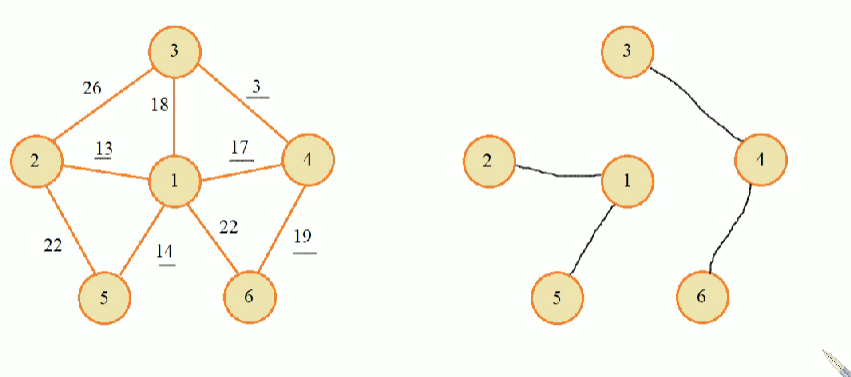

Вторая итерация:

Опять рассматриваем все ребра так, чтобы соединить ребро с минимальным весом разные группы вершин

 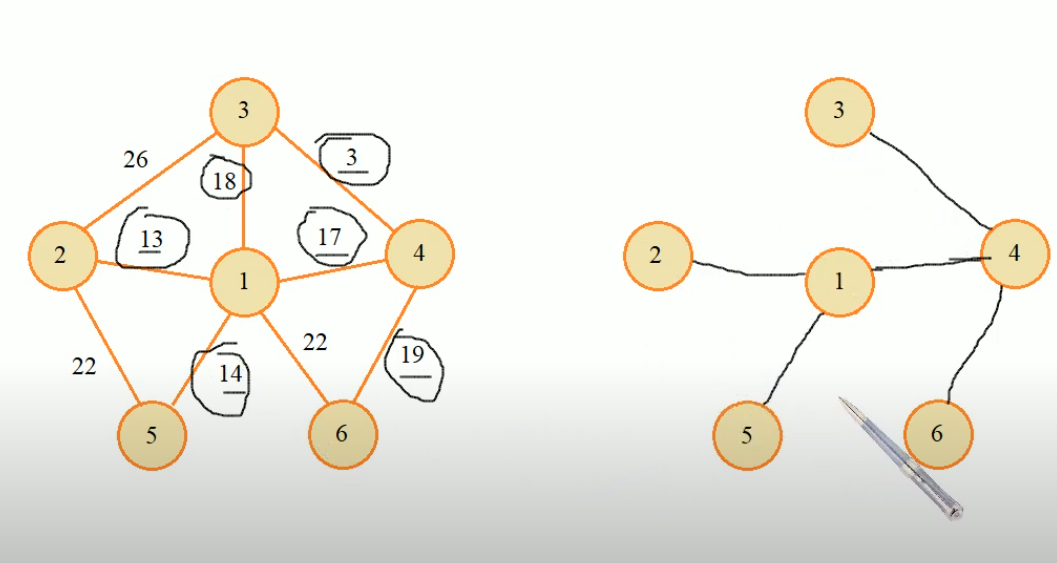

In [1]:
from functools import cmp_to_key

def comparator(a,b):
    return a[2] - b[2];

def kruskals_mst(V, edges):

    # Sort all edges
    edges = sorted(edges,key=cmp_to_key(comparator))
    
    # Traverse edges in sorted order
    dsu = DSU(V)
    cost = 0
    count = 0
    for x, y, w in edges:
        
        # Make sure that there is no cycle
        if dsu.find(x) != dsu.find(y):
            dsu.union(x, y)
            cost += w
            count += 1
            if count == V - 1:
                break
    return cost
    
# Disjoint set data structure
class DSU:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [1] * n

    def find(self, i):
        if self.parent[i] != i:
            self.parent[i] = self.find(self.parent[i])
        return self.parent[i]

    def union(self, x, y):
        s1 = self.find(x)
        s2 = self.find(y)
        if s1 != s2:
            if self.rank[s1] < self.rank[s2]:
                self.parent[s1] = s2
            elif self.rank[s1] > self.rank[s2]:
                self.parent[s2] = s1
            else:
                self.parent[s2] = s1
                self.rank[s1] += 1


if __name__ == '__main__':
    
    # An edge contains, weight, source and destination
    edges = [[0, 1, 10], [1, 3, 15], [2, 3, 4], [2, 0, 6], [0, 3, 5]]
    print(kruskals_mst(4, edges))

19
